In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = (20,10)

data = pd.read_csv("dataset_1.csv")
data = data.drop("Unnamed: 0", axis = 1)
data

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561
...,...,...
995,-5.060165,2.482045
996,-5.079404,2.773580
997,-5.861520,3.068426
998,-5.018934,3.110904


# Algorithme

1. Choisir le nombre de centroids et le nombre d'itérations
2. Assigner les centroids au hasard
3. Assigner chaque point au centroid le plus proche
4. Calculer la moyennes des distances entre le centroid et chaque point attribué pour définir un nouveau centroid
5. Réassigner les points à chaque centroid en fonction de leur nouvelle position
6. Répéter 4 et 5 en fonction du nombre d'itérations ou jusqu'à ce que la position des centroids ne bouge plus

# Définitions

### Calculer une distance euclidienne

In [74]:
def calc_distance(x1,x2):
    distance = (sum((x1-x2)**2))**0.5
    return distance

### Assigner un point à chaque cluster

In [143]:
def assign_cluster(centroids, data):
    clusters = []
    for i in range(data.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(calc_distance(centroid, data[i]))
#         print(distances)
        cluster = [point for point, val in enumerate(distances) if val == min(distances)]
#         print(cluster)
        clusters.append(cluster[0])
#     print(clusters)
    return clusters

### Calculer le nouveau centroid

In [85]:
def calc_new_centroid(clusters, data):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(data), pd.DataFrame(clusters, columns = ["clusters"])], axis = 1)
#     print(cluster_df)
    for c in set(cluster_df["clusters"]):
        current_cluster = cluster_df[cluster_df["clusters"] == c][cluster_df.columns[:-1]]
#         print(current_cluster)
        cluster_mean = current_cluster.mean(axis = 0)
#         print(cluster_mean)
        new_centroids.append(cluster_mean)
    return new_centroids

### Calculer la variance de chaque nouveau centroid 

In [77]:
def calc_centroid_sse(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),pd.DataFrame(clusters, columns=['clusters'])], axis=1)
    for c in set(cluster_df['clusters']):
        current_cluster = cluster_df[cluster_df['clusters'] == c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [78]:
data_array = np.array(data)

In [79]:
data_array

array([[ 0.68026725, -0.01634235],
       [ 3.80951844,  0.79848348],
       [-1.6613724 , -0.57766695],
       ...,
       [-5.86152028,  3.06842556],
       [-5.01893361,  3.11090369],
       [-6.79933099,  2.08232074]])

[0.0, 1.09100866456108]
[1.09100866456108, 0.0]
[0.8028015525119874, 1.8935541367008686]
[0.30202957971670324, 1.3886459474160167]
[0.1191337380869413, 1.0358643399455696]
[0.6619004704784899, 0.4370600773420767]
[0.14623969143909354, 1.2250702034375114]
[0.0744006934630663, 1.0938059589437725]
[0.34467502850308096, 1.434745502434573]
[0.6944532482541401, 1.7801384964243636]
[0.3579313513802077, 0.8509181389432343]
[0.6413825964317522, 1.7295039409204842]
[1.0910076834054314, 2.181959495768562]
[0.31058777791975717, 1.386244705906311]
[0.6273140759894508, 0.463983195442521]
[0.09552503915964534, 1.0608344435637942]
[1.3203443213360933, 2.404285865735294]
[0.14620850856794265, 1.1775611867973186]
[0.4811536893909964, 0.6100624937046243]
[0.37075043978636324, 1.4425703126113376]
[0.994561837337728, 2.0751282370522106]
[1.012506034779723, 0.1794182463557032]
[0.4448066321171191, 1.5184144102028152]
[0.34465748732987556, 0.8001396888425569]
[0.32663707848627377, 1.3635082748112184]
[0.1626

[1.5819568656758831, 0.8146814572271251]
[2.2602724196656503, 0.2883626382107916]
[1.4243178179768414, 1.6145361103275506]
[1.429006271695934, 1.108076571659488]
[1.5160586541708898, 0.7519759373790429]
[1.8998250844572573, 0.1529655386100232]
[1.4742551441075666, 0.944109514552391]
[1.5142985405154383, 0.8118372263383031]
[1.4462266881844468, 1.155772034882266]
[1.3336749237607786, 1.4978135032678193]
[1.5212446983838206, 0.5627145711266048]
[1.3662735234136276, 1.4483783525150837]
[1.4938679605129928, 1.9032677892565164]
[1.3812990612410305, 1.1031764516424682]
[1.9354322191608313, 0.202433825332922]
[1.5159509536196445, 0.7778390329322796]
[1.40310206864151, 2.120375534527282]
[1.4377496827708893, 0.893217738948029]
[1.8242573050843902, 0.3360393479230658]
[1.3423213462419876, 1.158548551778042]
[1.2866400419428405, 1.7907152896442575]
[2.092653138820812, 0.20675108645294574]
[1.317527876168637, 1.2342373112736644]
[1.6014283969605854, 0.5123669552460217]
[1.3021294656248046, 1.0770

[1.6004550839265146, 0.6757692390915823]
[1.288947136467217, 1.453690024432028]
[1.289586945524584, 1.5907368308541594]
[1.686039257696138, 2.3685837972761363]
[1.368808479056271, 1.7547498608295342]
[1.3109933239836884, 1.5642483516667347]
[1.2543846601599784, 1.6250846864767226]
[1.4695124771231012, 1.1222047572726923]
[1.5389034157808448, 0.6510541036422062]
[1.6174111391992623, 0.5753197153888376]
[1.4246591166563116, 0.7742847167939294]
[1.4364710353468226, 1.9795306296548958]
[2.00827175547119, 0.0360258766859771]
[1.6515858150483276, 0.5157586554344361]
[1.356868078708523, 1.4227097103029247]
[1.374522481675169, 1.9043947536742685]
[1.462487139856016, 0.8270821383033351]
[1.4516776015822732, 0.9993023623549618]
[1.3634935397694143, 1.6536649656810765]
[1.4154484544124513, 0.979293329715523]
[1.4620342938522333, 1.1721646001242367]
[1.399355753855845, 0.9677386750248776]
[1.4252755938406758, 0.8579535130342016]
[1.3917882413280294, 2.0239014011761363]
[1.355655933666861, 1.176072

[1.0373103788835711, 2.985542236771464]
[1.707179174567351, 3.6051784835700036]
[1.010026697899885, 2.997196810999498]
[1.279054999652344, 2.957300115968416]
[1.1257845833527236, 3.127539771745729]
[0.8162737944882152, 2.7677536874036175]
[1.2908721002182086, 3.0003533748558158]
[1.288539396669185, 3.0872403124242034]
[1.5042256206535314, 3.2623658243828393]
[1.3128884873952225, 3.2050431826118997]
[1.3235286108653053, 3.084891728670294]
[1.2745198130457303, 3.2431286620985253]
[1.0525972166411088, 2.9726674055347106]
[0.8517329512929064, 2.6817228777300772]
[1.5046793928371924, 3.299646909191841]
[1.1236966385435634, 3.0081659397554725]
[1.4260222590503564, 3.3067921645258003]
[1.261601964846017, 3.01294539110673]
[1.9324218202939059, 3.6499885674828993]
[1.1479833648517785, 3.1491202197336623]
[1.1737971869172108, 2.968420109535964]
[1.026592166678263, 3.0216233645226174]
[1.006948607503614, 2.6948624796308724]
[1.2571782008421235, 3.0680232200593998]
[1.3501655996762747, 3.137142730

[1.9607193707089412, 3.6733566723610105]
[0.8992103332545666, 2.8792210885145804]
[1.5531069600056595, 3.333481090454518]
[1.5273788080683208, 3.2968978700944103]
[1.224781799460448, 2.982582456397537]
[1.3898667880270759, 3.2924338344278863]
[1.8965669627128543, 3.5433604477060343]
[1.4414617557934553, 3.391379047411044]
[1.4116192570639063, 3.2811339113761164]
[1.9334828389977163, 3.797502924392661]
[0.8184694453355155, 2.815795401016204]
[1.4730931763179163, 3.2992064759928614]
[1.471716182797352, 3.409518434384114]
[1.2364371184657306, 3.206501544613083]
[1.275473190675052, 3.133654036699072]
[1.3750311932307204, 3.246581690237279]
[1.011097314382022, 2.8878701514337735]
[1.624549395662045, 3.2025036015213915]
[1.1034784695719762, 3.0672270630297236]
[1.4501946214278116, 3.400312471001674]
[1.5330678282923298, 3.3385993877646234]
[1.3849782817915235, 3.343360526854601]
[0.8436392243484546, 2.773642482134788]
[1.0175398498266885, 3.021085356396934]
[0.6307945554902192, 2.44813022975

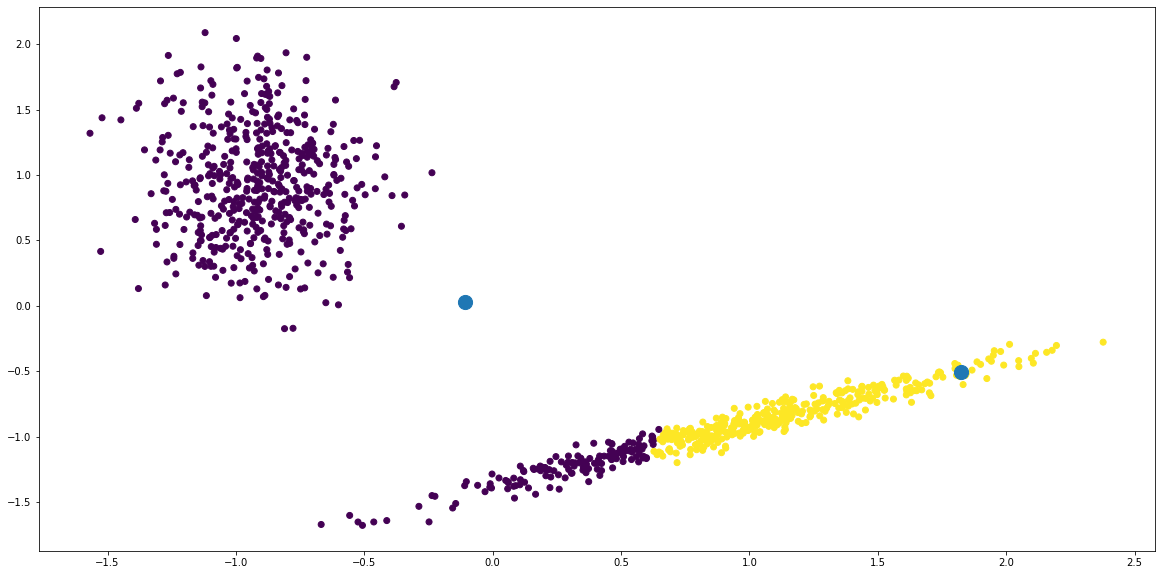

[2.2829866460308397, 0.12494982171993427]
[2.9047620264450673, 1.0198019440628878]
[2.061159084196097, 0.8813769922755799]
[2.1234411304978877, 0.3747467484536765]
[2.215925789657273, 0.01619330293214401]
[2.5709871156940065, 0.5837312622059123]
[2.1744664910023723, 0.21183745028767456]
[2.215177073330952, 0.08021562465048192]
[2.137446845790916, 0.4252806386445982]
[1.9895603417352445, 0.761863702975791]
[2.209201480195843, 0.237185972942517]
[2.028923493083397, 0.7131988821575443]
[2.074026033866651, 1.169908441320328]
[2.076772743168293, 0.36713403566125313]
[2.6129108768054694, 0.5623298305905663]
[2.216380305511259, 0.04323774047460853]
[1.9178162022618837, 1.3846363058021731]
[2.138763174280934, 0.1579265032066639]
[2.5093619326497825, 0.41457427826827564]
[2.0351730545435354, 0.422789687448471]
[1.8861904407988472, 1.055329577740418]
[2.730935535956666, 0.9262225280434484]
[2.005123256751475, 0.4986165669464313]
[2.2904243075036557, 0.23778272081173324]
[2.0003273626256752, 0.34

[2.2057960166526014, 0.07334303042606508]
[2.0188350868721394, 1.1692553441897677]
[2.0692686659694512, 0.49880944902015273]
[2.042442519876862, 0.42680966590350744]
[1.9281154674149337, 0.9594584812139555]
[2.655465548347294, 0.7085400995359288]
[2.1124687104616853, 0.2564559663149695]
[2.0601599223195755, 0.3090752718409175]
[2.061540440332695, 0.4855375047365]
[2.2011777990213095, 0.025151907684791946]
[2.142251398954191, 0.0988504835845928]
[2.5537681777745918, 0.5130915460586923]
[2.532424535453888, 0.5395663893972835]
[2.015740322720824, 0.8655933825990285]
[1.998057278202309, 0.4070223320442646]
[2.1428002012694987, 0.33227942460477666]
[2.590520422845205, 0.6611871925470134]
[2.029919162055575, 1.6127384055003913]
[2.262216066614914, 0.04186448817360435]
[2.2388640052892437, 0.01566168021892172]
[1.9422881792924167, 1.0210738822777254]
[1.9460630171430546, 0.7966470874477024]
[1.8963629923384424, 0.9670528009185312]
[2.1563362434858924, 0.21428443505456543]
[1.9754536164631937,

[0.4377190674139791, 2.365904328209597]
[0.7315574046619086, 2.929867890415207]
[0.7330164566560657, 2.7426210823186494]
[0.348625562803481, 2.4703327638210206]
[1.302288931513389, 3.507294653500659]
[0.47943070791953607, 2.7056962518019865]
[0.276841380587275, 2.3509808270774033]
[1.3958418435993178, 3.409877449533239]
[0.6465005927596197, 2.7489743185090294]
[1.5716793947469019, 3.6556407214123445]
[1.429219219709916, 3.5284680651776856]
[1.3024856190780594, 3.47371000946719]
[0.1389666935034166, 2.2261580882276237]
[0.7305311897988054, 2.819385652082364]
[0.4700784801575568, 2.5227894845407492]
[0.8955443499056875, 3.094478567630538]
[0.36184713333374485, 2.5876937581943866]
[0.6945575462178116, 2.7251286653433575]
[0.4320881561204156, 2.5617986155131565]
[0.2809628593115493, 2.4893185160689915]
[1.1838319840968017, 3.197784037312106]
[0.18318571459338134, 2.408972302134435]
[0.23729088856484506, 2.447968870415398]
[0.2398646286713518, 2.301440967723032]
[0.6438585111529554, 2.78020

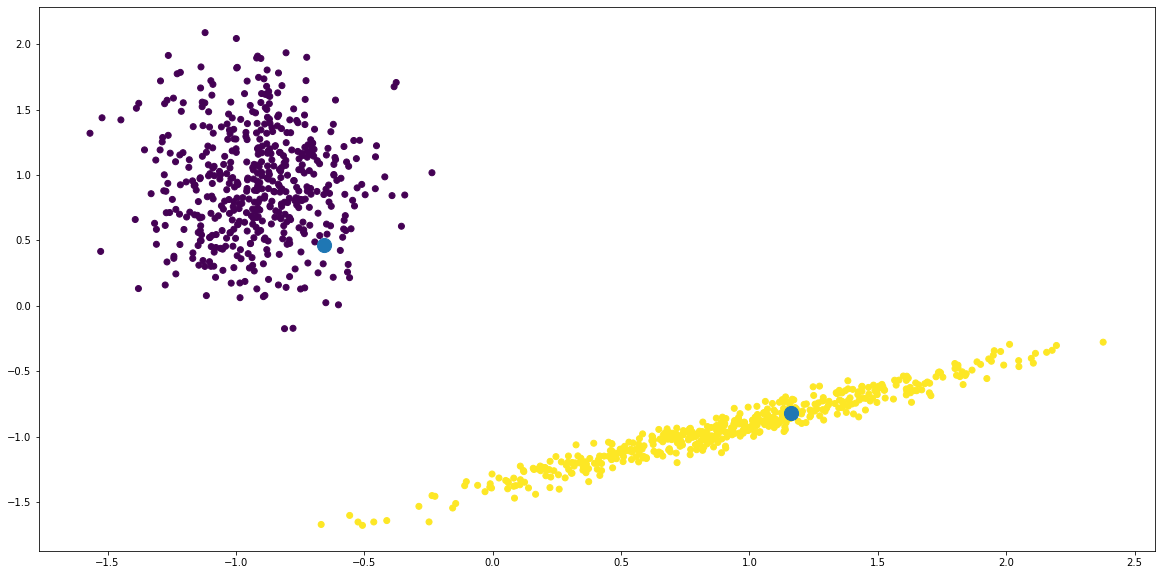

[2.7881430127489573, 0.22323422165782306]
[3.3200437859063348, 1.2895054737001634]
[2.600785543654995, 0.6144420025565472]
[2.646103768625116, 0.11560634778015191]
[2.7133651486458557, 0.25410214707284046]
[3.019280806624793, 0.8537200736416548]
[2.6870709835444604, 0.07844423555646006]
[2.7181567445865187, 0.19687233847308358]
[2.663001634204645, 0.1706123741734025]
[2.5272660734388896, 0.492040568580132]
[2.682789835209036, 0.48161947825689927]
[2.5655397446257853, 0.44442100015570485]
[2.6120789525271655, 0.9022139263235426]
[2.598302875893026, 0.09728564995250417]
[3.068522241794931, 0.8301222102976161]
[2.7163133421975445, 0.22868146581025825]
[2.448126656429575, 1.1147853076393497]
[2.6461835414515793, 0.11408939510431723]
[2.9761535647002892, 0.6821782381204045]
[2.5593426437060423, 0.1534282588801257]
[2.4258514274958136, 0.7857741451750817]
[3.142258348384709, 1.19510421028056]
[2.5330765649754863, 0.22930385460175168]
[2.764809688818431, 0.5024184342946942]
[2.518072764221473

[0.4989267400808333, 2.3424255003371424]
[0.17562809695249704, 2.648089004783757]
[0.2498147413805411, 2.736096253272011]
[0.2261209127892254, 2.396173253787813]
[0.7650713730672571, 2.202783774246916]
[0.20849783018824886, 2.8265798622691944]
[0.34052007140970436, 2.6744954385360846]
[0.5590593528609741, 2.3238218929531422]
[0.7847328950419017, 3.4035809383742346]
[0.23798824126587634, 2.5834197678772615]
[0.6161366435221164, 2.204592484984798]
[0.8843117640820485, 3.3547326252466383]
[0.18642977983808454, 2.665855287897035]
[1.0363704162162444, 3.5892548482549875]
[0.8928248983464296, 3.45741038400293]
[0.765686452491866, 3.383086126723968]
[0.49995767212556336, 2.1222928020601293]
[0.2519085777338815, 2.740263149694187]
[0.6598555196695012, 2.3650520425175228]
[0.3719646191740199, 2.991931609035663]
[0.24964940793277182, 2.467988197950602]
[0.2996262628080334, 2.6532777524675333]
[0.5526274608823569, 2.4130659021000618]
[0.26049380216936113, 2.3787353041930195]
[0.6857289849961724, 

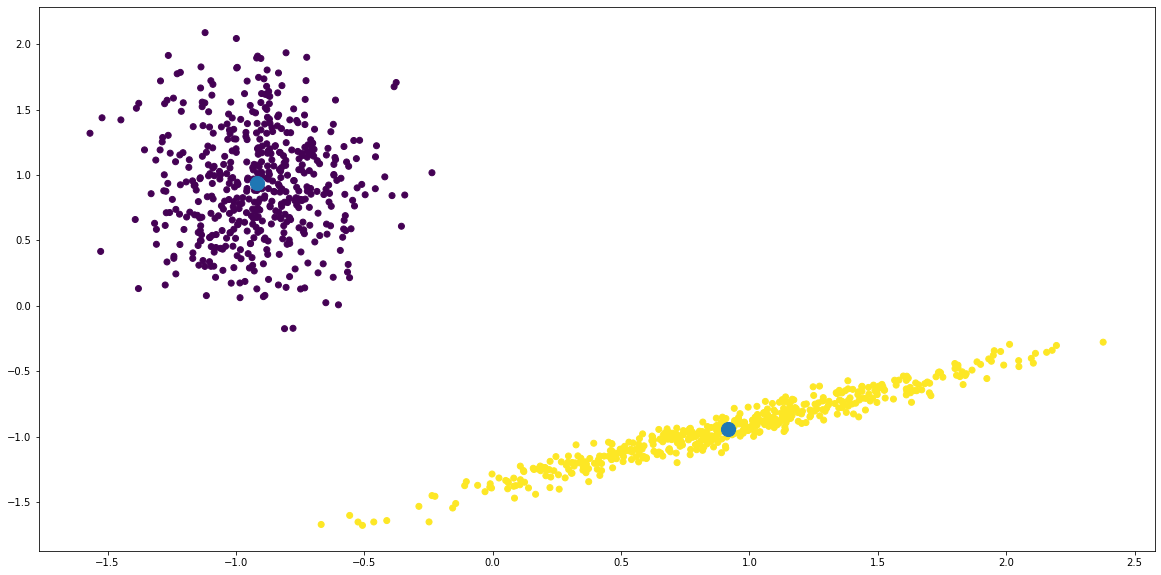

[2.7881430127489573, 0.22323422165782306]
[3.3200437859063348, 1.2895054737001634]
[2.600785543654995, 0.6144420025565472]
[2.646103768625116, 0.11560634778015191]
[2.7133651486458557, 0.25410214707284046]
[3.019280806624793, 0.8537200736416548]
[2.6870709835444604, 0.07844423555646006]
[2.7181567445865187, 0.19687233847308358]
[2.663001634204645, 0.1706123741734025]
[2.5272660734388896, 0.492040568580132]
[2.682789835209036, 0.48161947825689927]
[2.5655397446257853, 0.44442100015570485]
[2.6120789525271655, 0.9022139263235426]
[2.598302875893026, 0.09728564995250417]
[3.068522241794931, 0.8301222102976161]
[2.7163133421975445, 0.22868146581025825]
[2.448126656429575, 1.1147853076393497]
[2.6461835414515793, 0.11408939510431723]
[2.9761535647002892, 0.6821782381204045]
[2.5593426437060423, 0.1534282588801257]
[2.4258514274958136, 0.7857741451750817]
[3.142258348384709, 1.19510421028056]
[2.5330765649754863, 0.22930385460175168]
[2.764809688818431, 0.5024184342946942]
[2.518072764221473

[0.37180123028870044, 2.7139176693596148]
[0.4905175502152161, 2.37909470776404]
[0.5043826945530627, 2.118197989351768]
[0.528655108621769, 2.4934014592237665]
[0.3291073469077773, 2.293234967051156]
[0.17719620321674587, 2.7817467072873296]
[0.30230214837643077, 2.4556732647108794]
[0.4888271004983389, 2.8756414035045825]
[0.39210507497722324, 2.7409270290461825]
[0.7816205921941929, 2.066628614265538]
[0.378627055290671, 2.4899658522663897]
[0.5004934741051047, 2.911629245942278]
[0.3541586336046465, 2.561111291060313]
[0.2785350095228628, 2.3741783961583063]
[0.3750725768412548, 2.3667381741440794]
[0.4237259247488559, 2.484395802562183]
[0.4570847949229726, 2.9888913141123363]
[0.6848970272561267, 2.269857337928988]
[0.6242929613672058, 3.226744024159047]
[0.29884383781853047, 2.4761226080257384]
[0.5452209406618785, 2.2328757342535557]
[0.05957474818297508, 2.5626690418355618]
[0.16493889697852132, 2.7309064092727917]
[0.010955853328810605, 2.6187603563895085]
[0.1877017666427294

In [100]:
data = StandardScaler().fit_transform(data)

k_test = 2
iteration = 10
clusters_sse = []
i = 0
centroids = [data[z] for z in range(k_test)]
clusters = assign_cluster(centroids, data)
tolerance = 0.01

while i < iteration:
    centroids = calc_new_centroid(clusters, data)
    clusters = assign_cluster(centroids, data)
    cluster_sse = np.mean(calc_centroid_sse(clusters, data))
    clusters_sse.append(cluster_sse)
    if i > 2:
        if (abs((clusters_sse[i-1]-clusters_sse[i-2]))<tolerance):
            print("Le modèle a convergé au bout de %s itérations." % i)
            break
    i+=1
    plt.scatter(data[:,0], data[:,1], c = clusters)
    plt.scatter(np.array(centroids)[:,0],np.array(centroids)[:,1], s = 200)
    plt.show()
#     print(i, cluster_sse)

In [231]:
class Kmeans:
    def __init__(self, k=6, iteration=10, tolerance=0.01):
        self.k = k
        self.iteration = iteration
        self.tolerance = tolerance
    
    def calc_distance(self,x1,x2):
        distance = (sum((x1-x2)**2))**0.5
        return distance
    
    
    def assign_cluster(self, centroids, data):
        clusters = []
        for i in range(data.shape[0]):
            distances = []
            for centroid in centroids:
                distances.append(calc_distance(centroid, data[i]))
#             print(distances)
            cluster = [point for point, val in enumerate(distances) if val == min(distances)]
            clusters.append(cluster[0])
        return clusters

    def calc_new_centroid(self, clusters, data):
        new_centroids = []
        cluster_df = pd.concat([pd.DataFrame(data), pd.DataFrame(clusters, columns = ["clusters"])], axis = 1)
    #     print(cluster_df)
        for c in set(cluster_df["clusters"]):
            current_cluster = cluster_df[cluster_df["clusters"] == c][cluster_df.columns[:-1]]
    #         print(current_cluster)
            cluster_mean = current_cluster.mean(axis = 0)
    #         print(cluster_mean)
            new_centroids.append(cluster_mean)
        return new_centroids

    def calc_centroid_sse(clusters, cluster_array):
        sum_squares = []
        cluster_df = pd.concat([pd.DataFrame(cluster_array),pd.DataFrame(clusters, columns=['clusters'])], axis=1)
        for c in set(cluster_df['clusters']):
            current_cluster = cluster_df[cluster_df['clusters'] == c][cluster_df.columns[:-1]]
            cluster_mean = current_cluster.mean(axis=0)
            mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
            sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
        return sum_squares


    def fit(self,data):
        
        i=0
        self.centroids = [data[z] for z in range(self.k)]
        self.clusters = assign_cluster(self.centroids, data)
        self.clusters_sse = []
        
        while i < self.iteration:
            self.centroids = calc_new_centroid(self.clusters, data)
            self.clusters = assign_cluster(self.centroids, data)
            cluster_sse = np.mean(calc_centroid_sse(self.clusters, data))
            self.clusters_sse.append(cluster_sse)
#             if i > 2:
#                 if (abs((self.clusters_sse[i-1]-clusters_sse[i-2]))<tolerance):
#                     print("Le modèle a convergé au bout de %s itérations." % i)
#                     break
#                 else:
#                     continue
#             else:
#                 continue
            i+=1
        return centroids
#             print(self.centroids)
#             plt.scatter(data[:,0], data[:,1], c = self.clusters)
#             plt.scatter(np.array(self.centroids)[:,0],np.array(self.centroids)[:,1], s = 200)
#             plt.show()
            
    def predict(self,data):
        predictions = assign_cluster(self.centroids, data)
        plt.scatter(data[:,0], data[:,1], c = predictions)
        plt.scatter(np.array(self.centroids)[:,0],np.array(self.centroids)[:,1], s = 200)
        plt.show()
#         return predictions

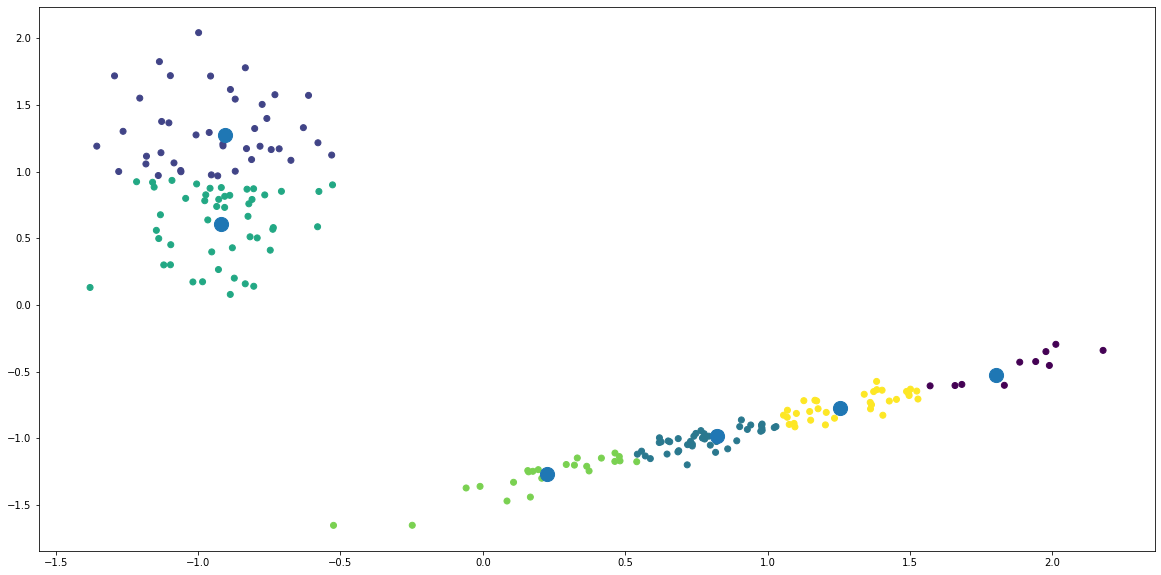

In [232]:
from sklearn.utils import shuffle
data = shuffle(data)

X = data[:800]
y = data[800:]

model = Kmeans()
model.fit(X)
model.predict(y)